# Author : Tauhid

 <font size="5">  </font>

# TasK 1: Prediction using Supervised ML

</font>

This project is Based on Supervised learing. Under Supervised learing, I've used Liner Regression, and libraries like Numpy, Pandas, Seaborn, Matplotlib, and sklearn. In this model, my task is to predict the mark obtained by a student if he studies 9.25 hrs 

# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [6]:
#Import all required libraries in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Reading the data from url link

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data is imported successfully")
df

Data is imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Reading the first five rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Reading the last five rows
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
# To check the number of null values in columns
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visualizing the data

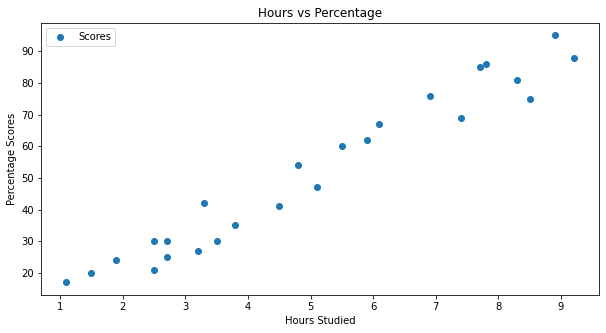

In [17]:
# Plotting the distribution of scores
df.plot(x='Hours',y='Scores',style='o',figsize=(10,5))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [20]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

# Model Training

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


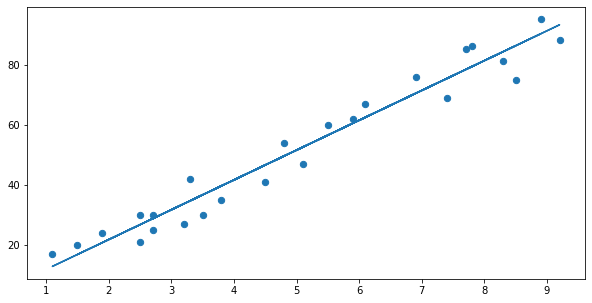

In [37]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(10,5))
plt.scatter(X, y,s=40)
plt.plot(X, line);
plt.show()

# Making Prediction

In [41]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Comparing Actual vs Predicted values:

In [43]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [44]:
print("Training Score: ",regressor.score(X_train, y_train))
print("Test Score: ",regressor.score(X_test, y_test))

Training Score:  0.9515510725211552
Test Score:  0.9454906892105356


# Predicting Own Values

In [48]:
hours = 9.25
own_pred = regressor.predict(np.array([hours]).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [50]:
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred)) 
print("Root Mean Squared Error: ",np.sqrt(mean_absolute_error(y_test, y_pred)))

Mean Squared Error:  21.5987693072174
Mean Absolute Error:  4.183859899002975
Root Mean Squared Error:  2.0454485813637495
